# Assignment 7 Decision Trees and Random Forest

## Problem Statement 1
A cloth manufacturing company is interested to know about the different attributes contributing to high sales. Build a decision tree & random forest model with Sales as target variable (first convert it into categorical variable).

> ### 1. Business Problem
1.1 What is the business objective?
- Identify the factors that contribute most significantly to high sales in the cloth manufacturing company.
- Use Decision Tree and Random Forest models to classify sales as high or low, enabling better decision-making for marketing, production, and resource allocation.

1.2 Are there any constraints?
- Data Availability: Missing or incomplete data might impact the quality of the model.
- Interpretability: The model should provide insights into the key drivers of high sales.
- Balance: The dataset may have imbalanced classes (e.g., fewer instances of high sales compared to low sales).
- Computational Resources: Random Forest models can be resource-intensive, especially with large datasets.

> ### 2. Data Dictionary
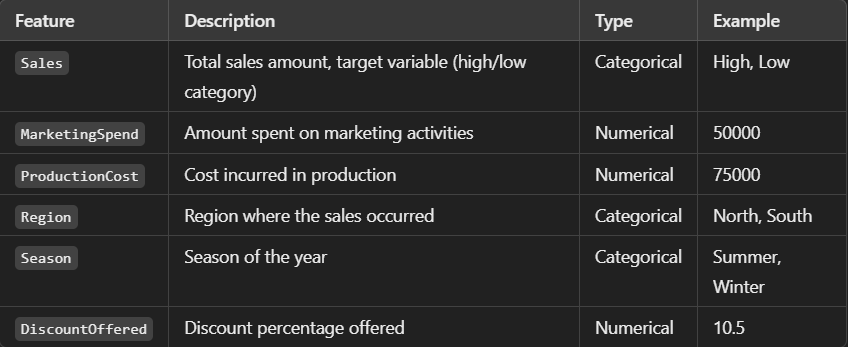

In [21]:
import pandas as pd 
df=pd.read_csv("Datasets/Company_Data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


> ### 3 .Exploratory Data Analysis

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [23]:
df.shape

(400, 11)

In [24]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [25]:
df.duplicated().sum()

0

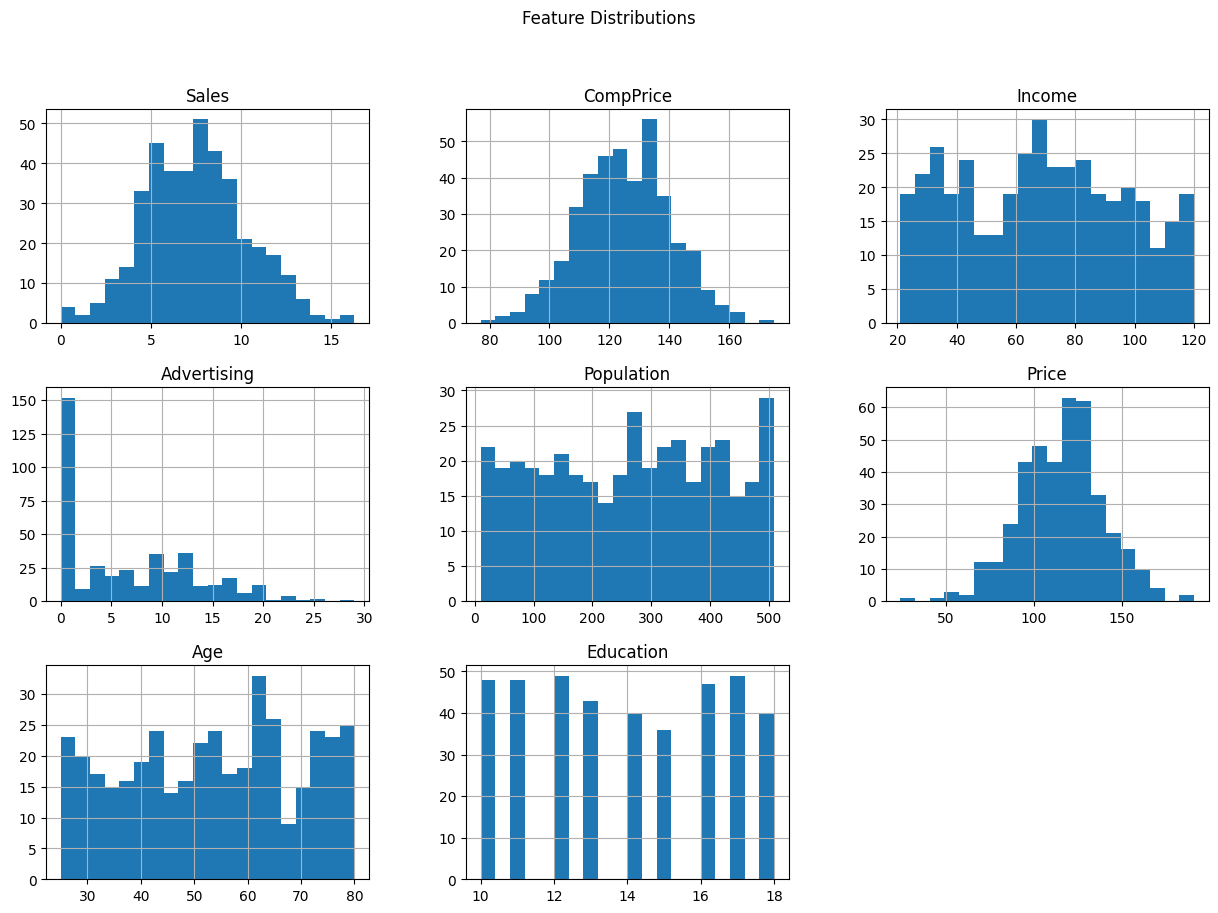

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for all numerical features
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.show()


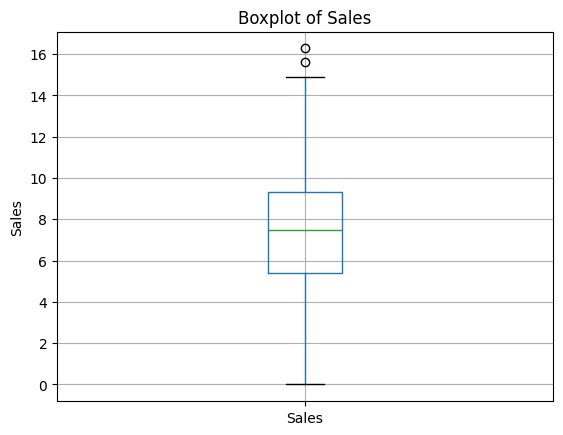

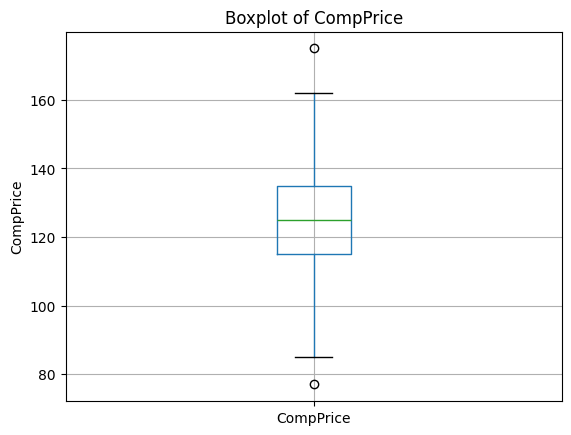

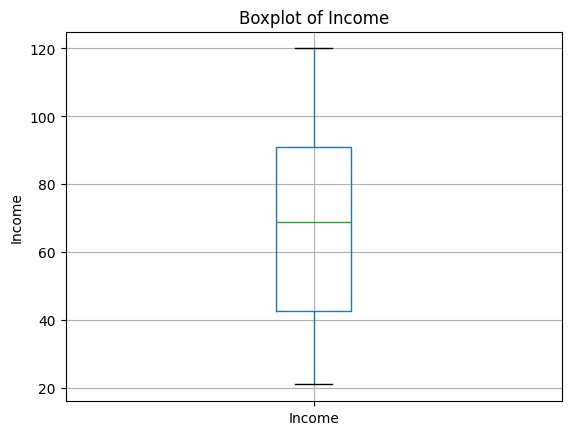

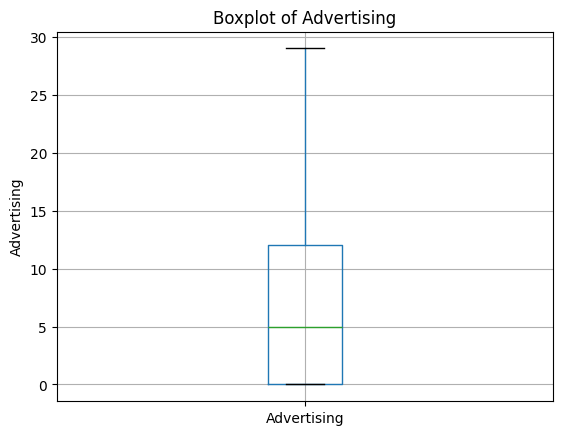

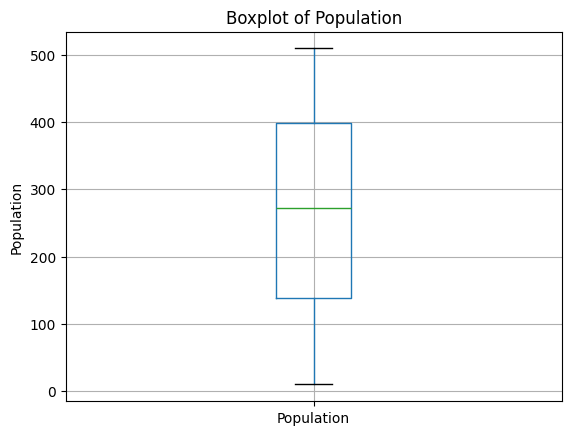

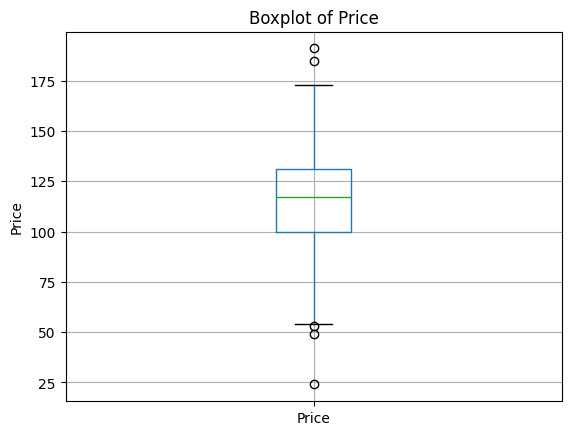

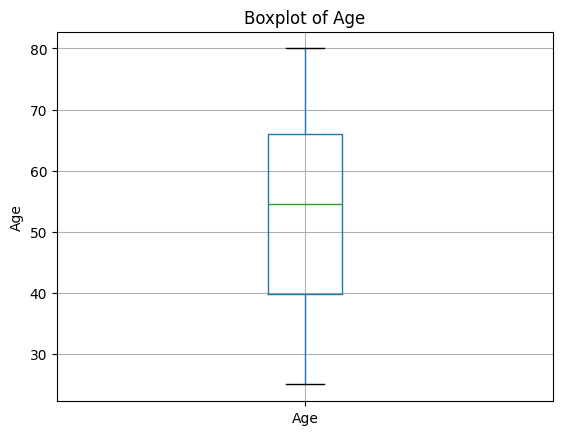

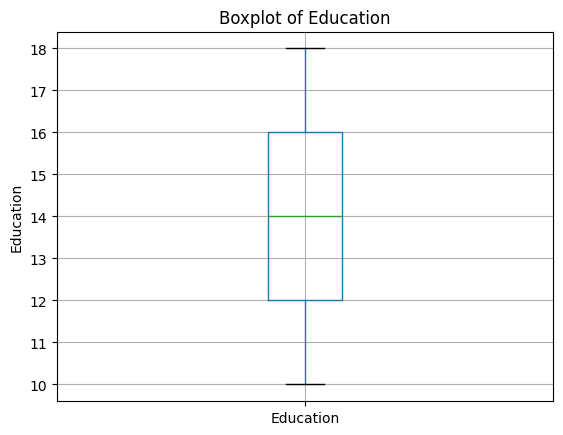

In [27]:
# Loop through numerical columns and plot boxplots
for i in df.select_dtypes(include=['float64', 'int64']):
    df.boxplot(i)
    plt.title(f'Boxplot of {i}')
    plt.ylabel(i)
    plt.show()


In [28]:
#Not many outliers, se we can skip the outlier handling

In [29]:
pd.crosstab(df['Urban'],df['US'])

US,No,Yes
Urban,,
No,46,72
Yes,96,186


> ### 4.Preprocessing 

In [31]:
#Convert Sales to a categorical variable
df['Sales_Category'] = ['High' if x > df['Sales'].mean() else 'Low' for x in df['Sales']]
df['Sales_Category'] = df['Sales_Category'].map({'High': 1, 'Low': 0})

In [32]:
# Drop the original `Sales` column
df = df.drop(columns=['Sales'])

> ### 4.Training the model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [34]:
X = df.drop(columns=['Sales_Category'])
y = df['Sales_Category']

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

> ### 5. DT and RF model classifiers

In [36]:
#Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

In [38]:
#Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

> ### Evaluation

In [39]:
# Evaluate Decision Tree
print("Decision Tree Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, dt_predictions)}")
print(classification_report(y_test, dt_predictions))

Decision Tree Evaluation:
Accuracy: 0.7
              precision    recall  f1-score   support

           0       0.71      0.59      0.65        37
           1       0.69      0.79      0.74        43

    accuracy                           0.70        80
   macro avg       0.70      0.69      0.69        80
weighted avg       0.70      0.70      0.70        80



In [40]:
# Evaluate Random Forest
print("Random Forest Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, rf_predictions):.2f}")
print(classification_report(y_test, rf_predictions))

Random Forest Evaluation:
Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.86      0.81      0.83        37
           1       0.84      0.88      0.86        43

    accuracy                           0.85        80
   macro avg       0.85      0.85      0.85        80
weighted avg       0.85      0.85      0.85        80



In [41]:
#Random forest has given good result 

> ### 7. Conclusion
After performing the Decision Tree and Random Forest models, I understand that a cloth manufacturing company is interested in analyzing sales. The objective is to build a predictive model with Sales as the target variable, focusing specifically on urban locations. This approach helps the company make data-driven decisions to optimize performance in key urban markets.